In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data science project\Data_Science_Project\Dataset\hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [22]:
df.shape

(15004, 11)

In [23]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'age'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


* There are 15004 non-null values for all the column i.e no null values only 2 columns Salary and age has a 14975 and 3080 non-null values i.e it has missing rows.



In [25]:
df.describe(include='object')

,left,Department,salary
count,15004,15004,14975
unique,3,10,3
top,0,sales,low
freq,11428,4140,7289


In [26]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [27]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

<Axes: >

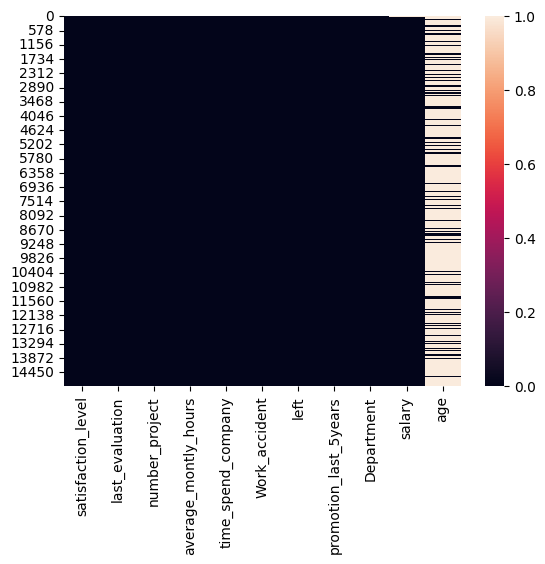

In [28]:
sns.heatmap(df.isna())